# Problem 1

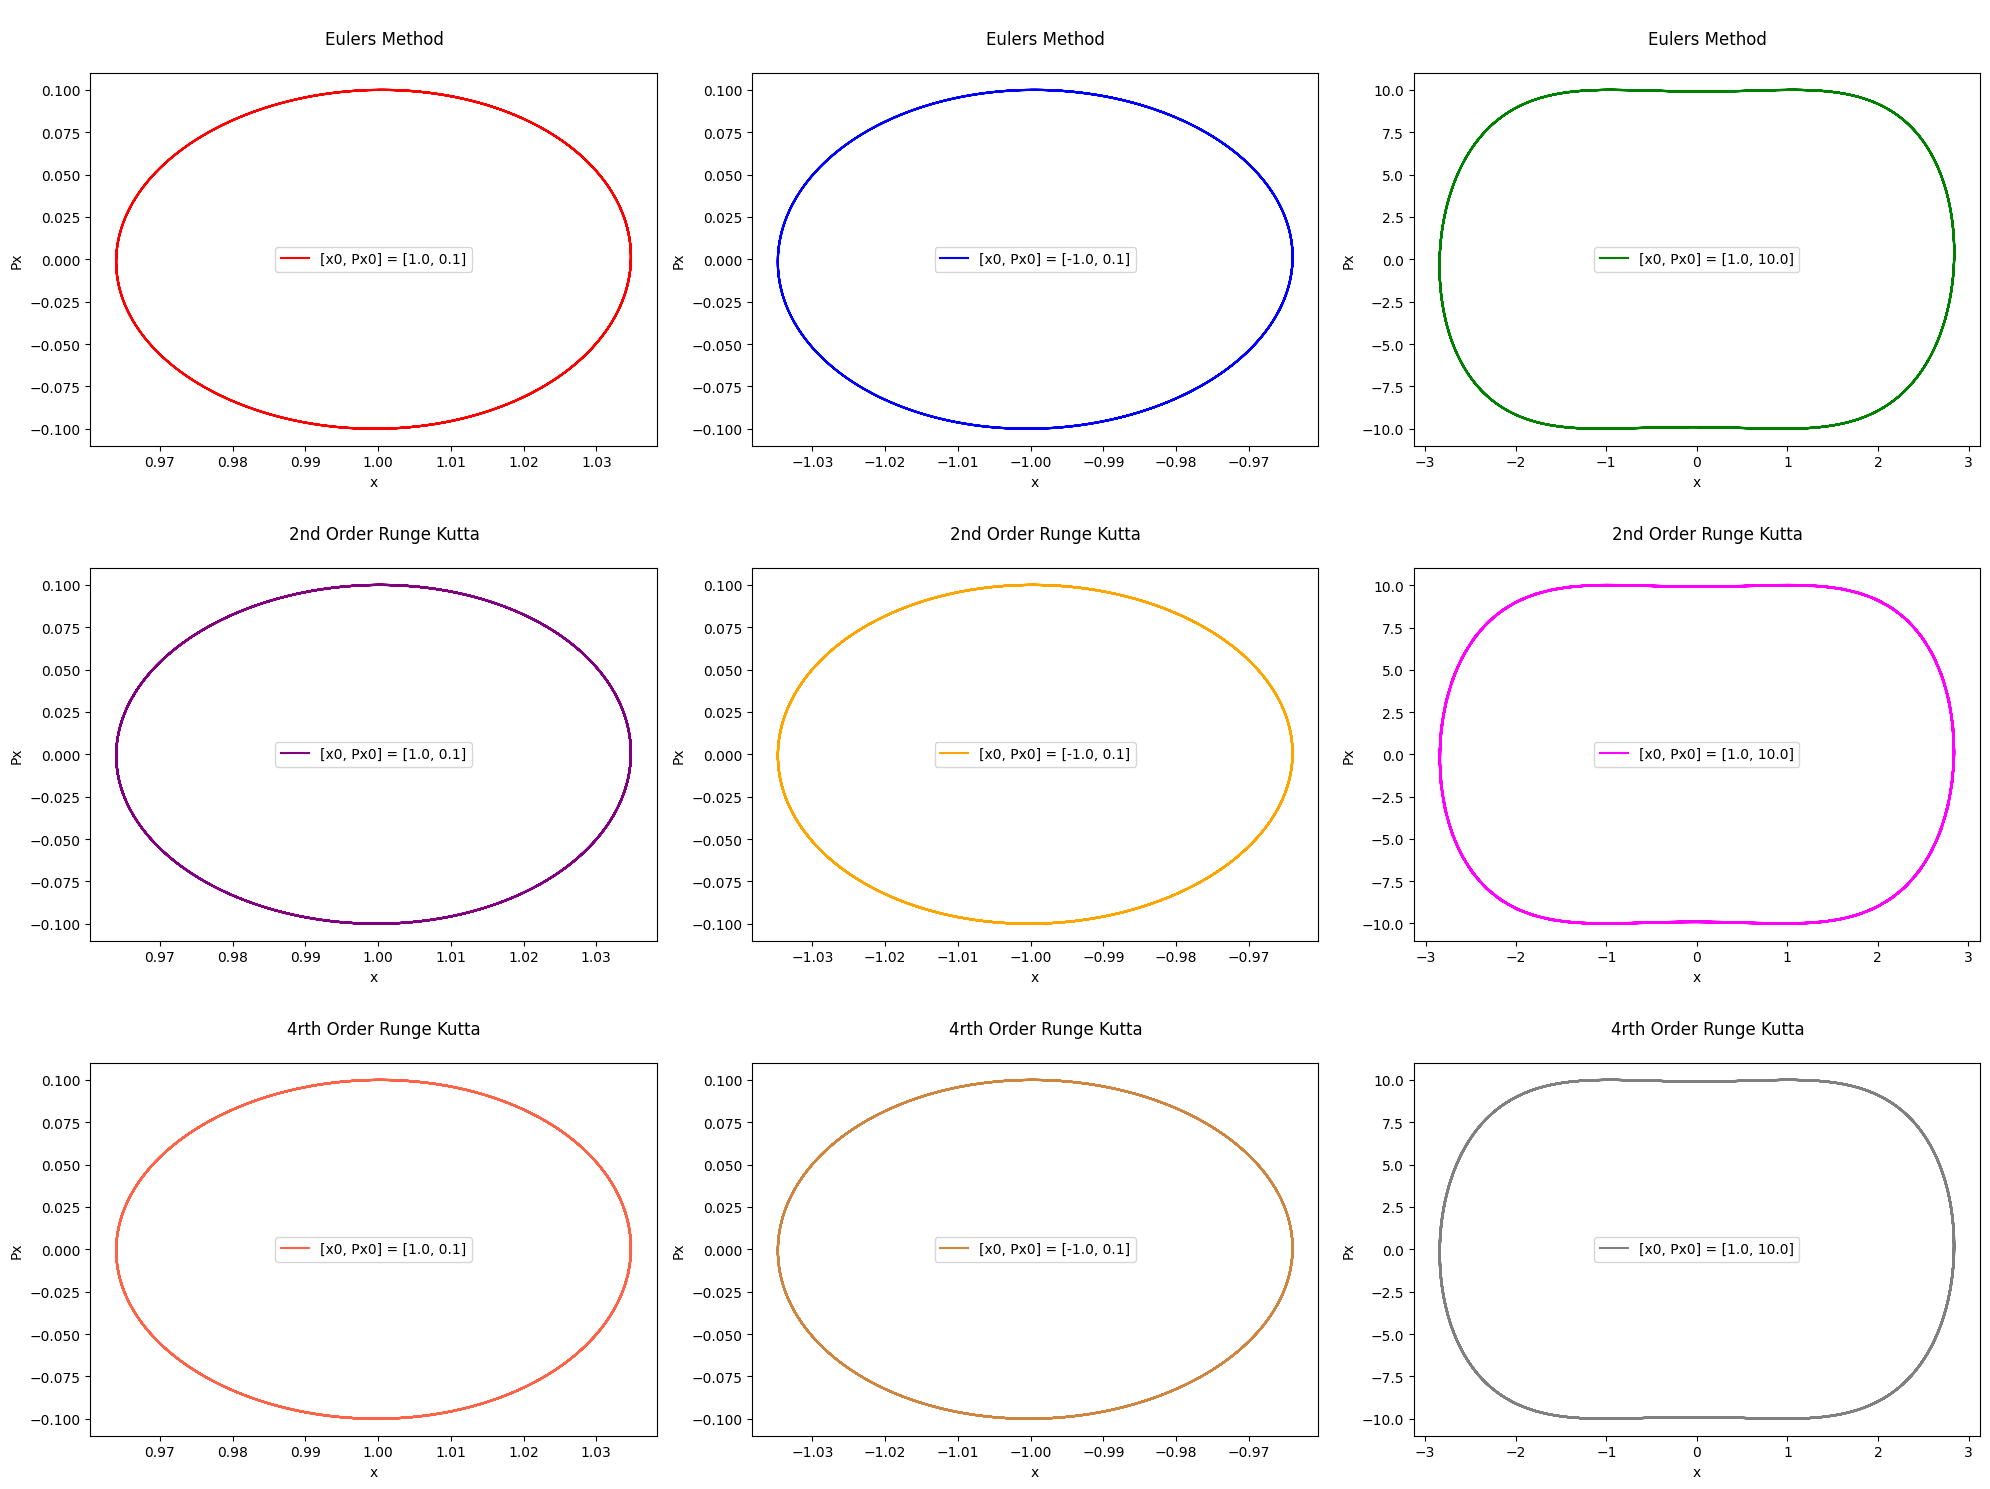

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the potential energy function V(x)
def V(x):
    return (x**2 - 1)**2

# Define the derivative of the potential energy function with respect to x i.e. V'(x)
def V_1(x):
    return 4 * x**3 - 4 * x

# Defining a funciton that uses Euler's Method to calculate the trajectory
def Eulers_Method(x0, Px0, dt, steps):
    """
    Eulers Method
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px

    return x_values, Px_values


# 2nd Order Runge Kutta
# Defining a funciton that uses Euler's Method to calculate the trajectory
def Runge_Kutta_2nd(x0, Px0, dt, steps):
    """
    2nd Order Runge Kutta
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px
        

        # RK2 step 1: Estimate k1 for both x and px
        k1_x = dt * Px
        k1_px =-dt * V_1(x)

        # RK2 step 2: Estimate k2 for both x and px
        k2_x = dt * (Px + 0.5 * k1_px)
        k2_px = - dt * V_1(x + 0.5 * k1_x)

        # Update x and px using the weighted average of k1 and k2
        x = x + k2_x
        Px = Px + k2_px

    return x_values, Px_values


# Defining a funciton that uses Euler's Method to calculate the trajectory
def Range_Kutta_4rth(x0, Px0, dt, steps):
    """
    4rth Order Runge Kutta
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px
        
        # RK4 step 1: Calculate k1 for x and Px
        k1_x = dt * Px
        k1_Px = -dt * V_1(x)

        # RK4 step 2: Calculate k2 for x and Px
        k2_x = dt * (Px + 0.5 * k1_Px)
        k2_Px = -dt * V_1(x + 0.5 * k1_x)

        # RK4 step 3: Calculate k3 for x and Px
        k3_x = dt * (Px + 0.5 * k2_Px)
        k3_Px = -dt * V_1(x + 0.5 * k2_x)

        # RK4 step 4: Calculate k4 for x and Px
        k4_x = dt * (Px + k3_Px)
        k4_Px = -dt * V_1(x + k3_x)

        # Update x and Px using weigdtted averages of k1, k2, k3, and k4
        x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        Px += (k1_Px + 2 * k2_Px + 2 * k3_Px + k4_Px) / 6

    return x_values, Px_values
dt = 0.01  # Time interval
steps = 1000  # Number of steps

# Finding the values of position and momentum for different initial conditions
# And plotting them using matplotlib

#initial_conditions 
ic = [[1.0, 0.1],
      [-1.0, 0.1],
      [1.0, 10.0]]
colors = [['red','blue','green'],
         ['purple','orange','magenta'],
         ['tomato','peru','gray']]
fig, axes = plt.subplots(3,3, figsize=(20,15))

functions = [Eulers_Method, Runge_Kutta_2nd,Range_Kutta_4rth]
for func in functions:
    for i in ic:
        x_, Px_ = func(i[0],i[1], dt, steps)
        axes[functions.index(func),ic.index(i)].plot(x_, Px_, label=f"[x0, Px0] = {i}", color=colors[functions.index(func)][ic.index(i)])
        axes[functions.index(func),ic.index(i)].set_xlabel("x")
        axes[functions.index(func),ic.index(i)].set_ylabel("Px")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")
plt.tight_layout()
plt.show()

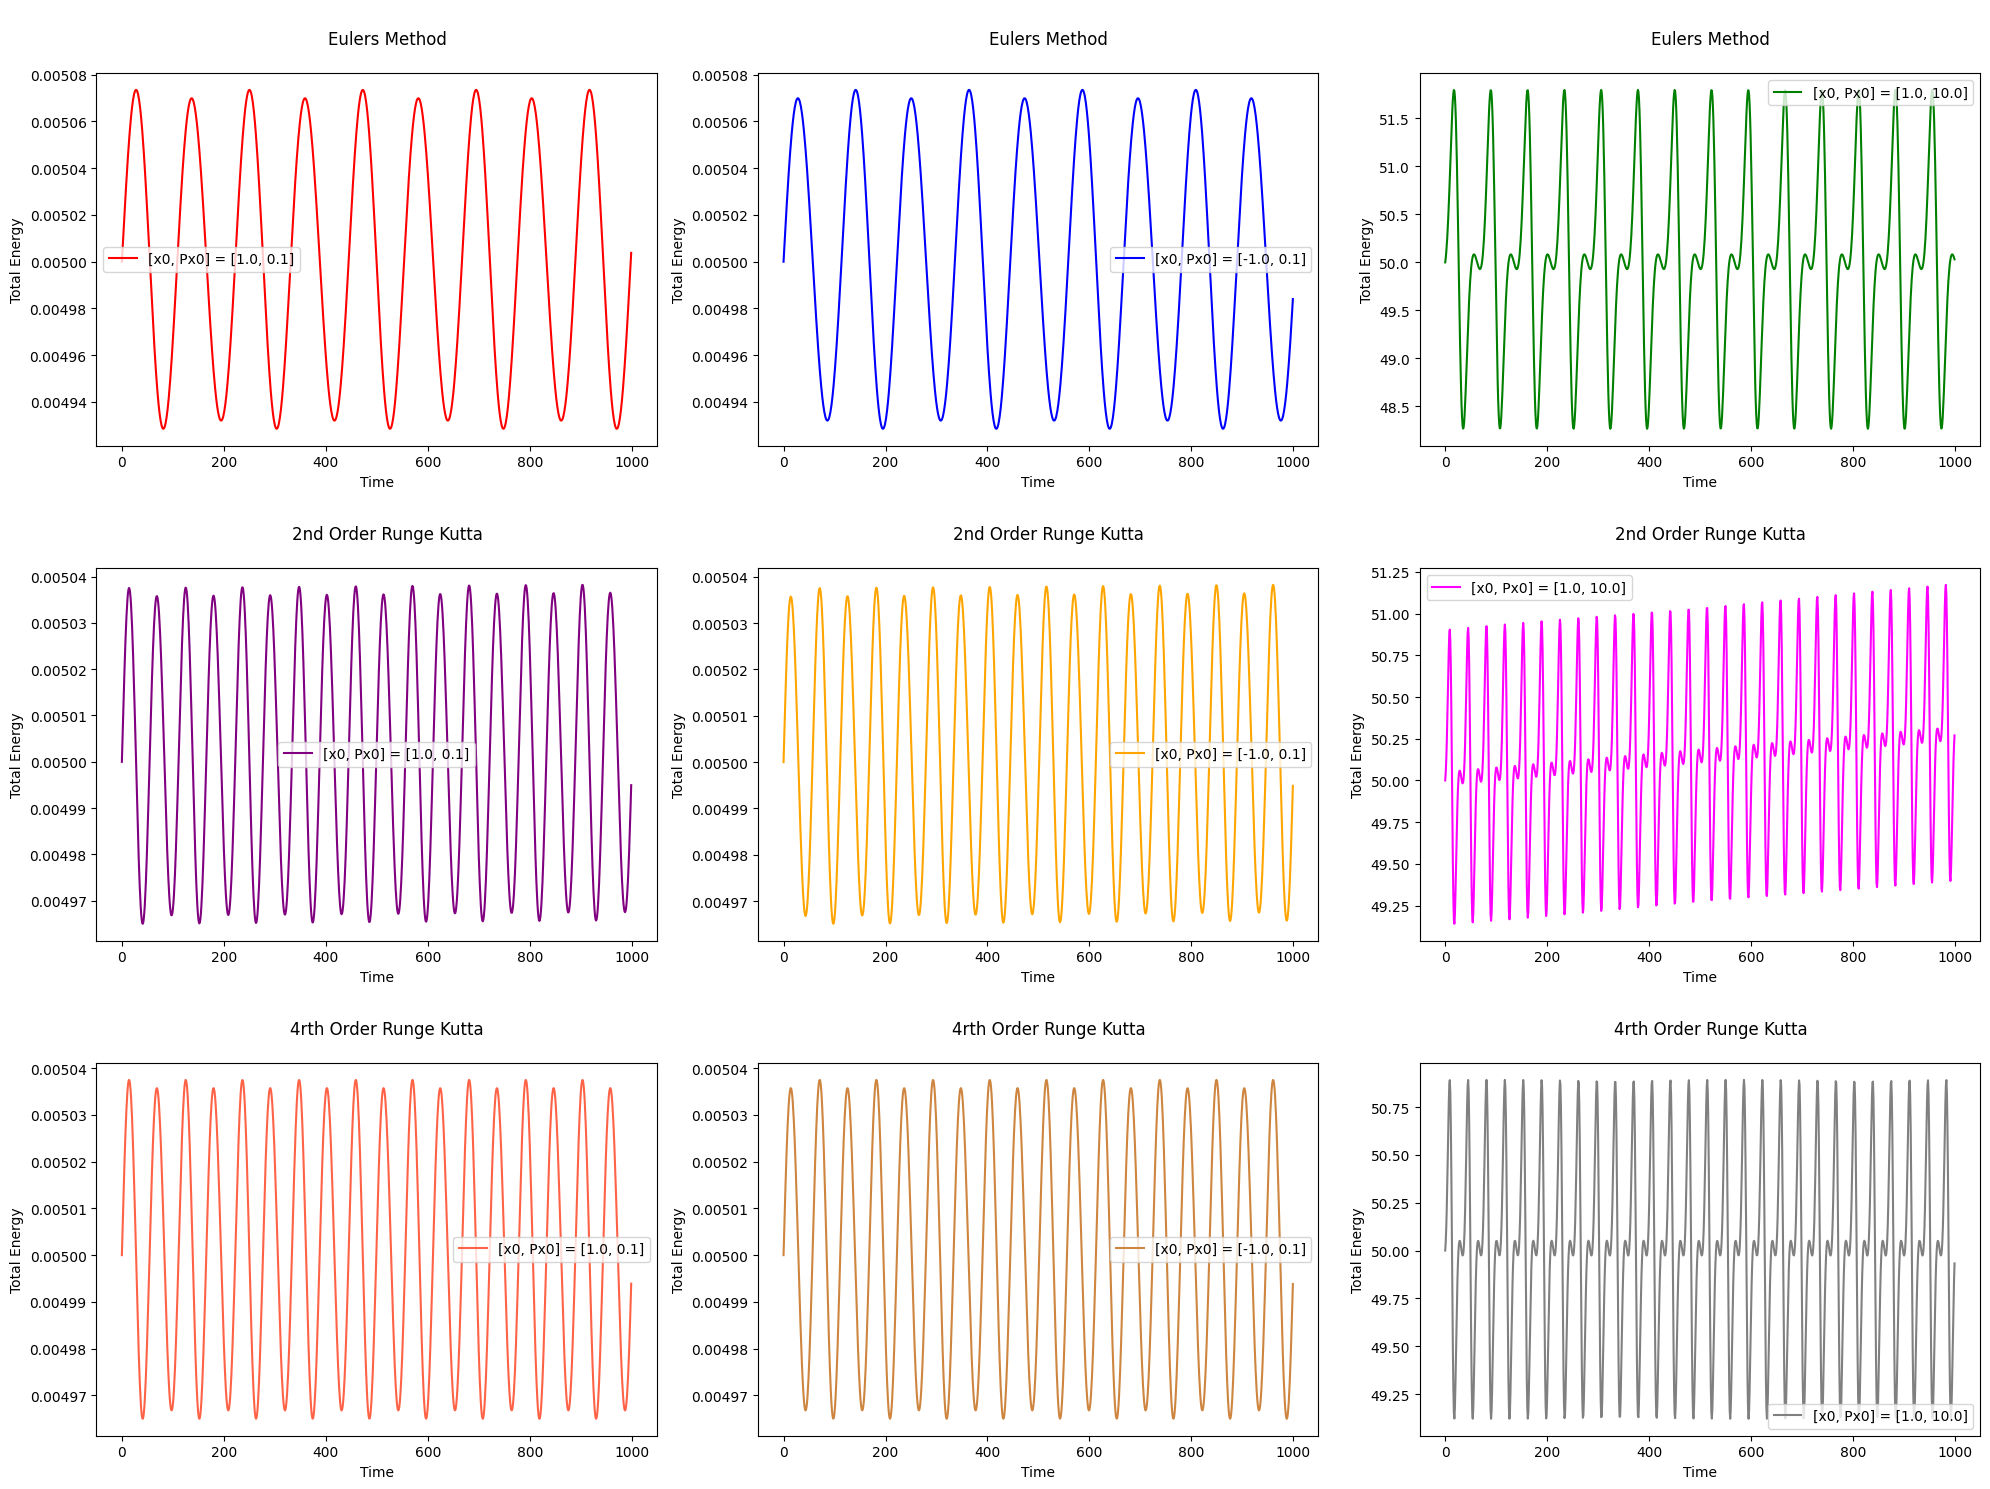

In [2]:
# Conservation of Energy
dt = 0.01
steps = 1000
fig, axes = plt.subplots(3,3, figsize=(20,15))
for func in functions:
    for i in ic:
        x_, Px_ = func(i[0],i[1], dt, steps)
        E = 0.5*(np.array(Px_)**2)+V(np.array(x_))
#         E0 = 0.5*(i[1]**2)+V(i[0])
#         relative_error = abs((E-E0)/E0)
        axes[functions.index(func),ic.index(i)].plot(E, label=f"[x0, Px0] = {i}", color=colors[functions.index(func)][ic.index(i)])
        axes[functions.index(func),ic.index(i)].set_xlabel("Time")
        axes[functions.index(func),ic.index(i)].set_ylabel("Total Energy")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")
plt.tight_layout()
plt.show()

In [3]:
# Steps size against the accuracy
dt = 0.035 #Initial Step Size
steps = 1000
mrea = [2,3]
while np.mean(mrea)>=1: # The while loop breaks when the mean error of all the inintial conditions in less than 1%
    mrea = []
    for func in functions:
        for i in ic:
            x_, Px_ = func(i[0],i[1], dt, steps) 
            E = 0.5*(np.array(Px_)**2)+V(np.array(x_)) # Calculation of Energy
            E0 = 0.5*(i[1]**2)+V(i[0]) # Calculation of Energy using Initial Conditions
            percent_error = abs((E-E0)/E0)*100
            mrea.append(np.mean(percent_error))
    dt-=0.001 # Reducing the stepsize 
print("Step Size for 1% Error:",dt)

Step Size for 1% Error: 0.011999999999999983


# Problem 2

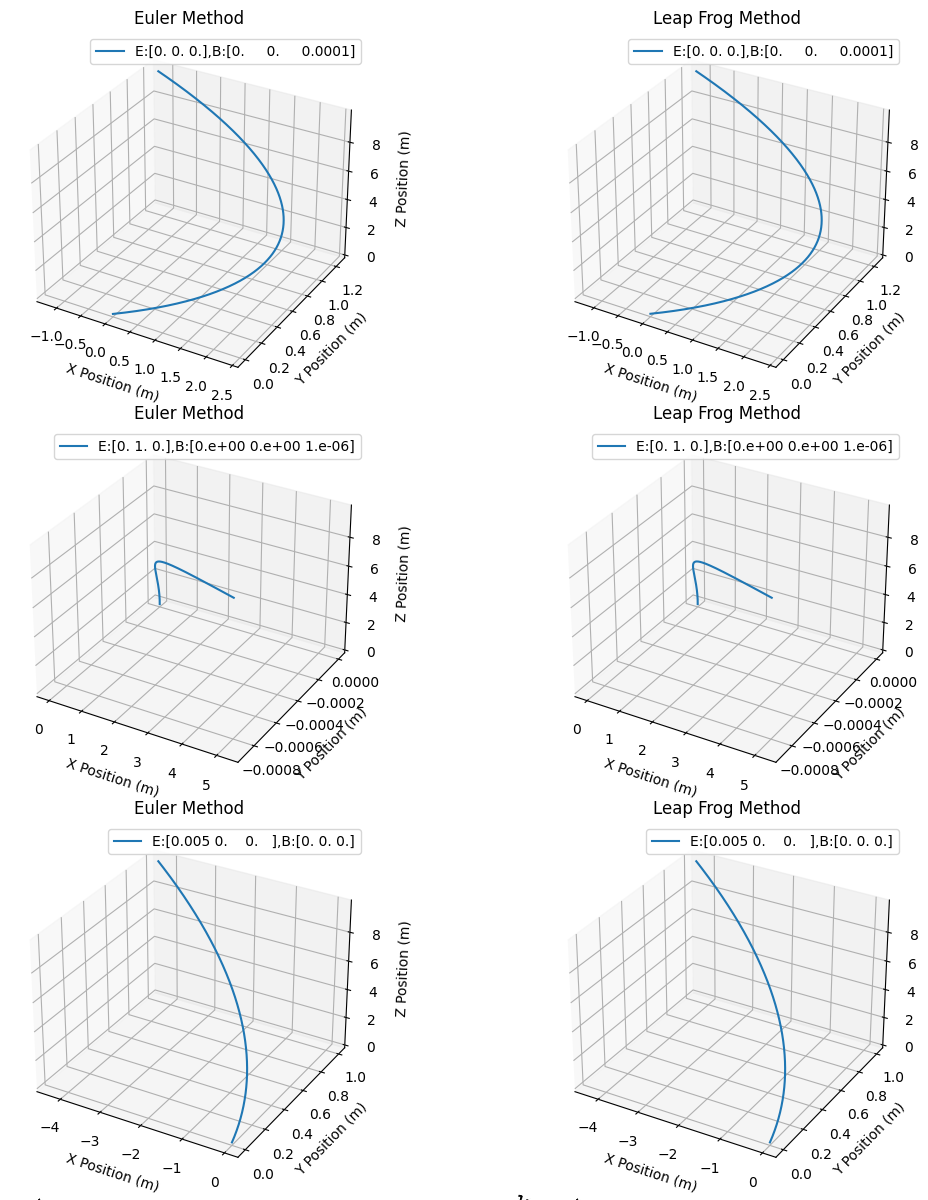

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Constants
q = -1.602e-19  # Charge of the electron in Coulombs
m = 9.109e-31  # Mass of the electron in kg

# Function to calculate Lorentz force
def lorentz_force(v, E, B):
    F = q * (E + np.cross(v, B))
    return F

# Function to update velocity and position using Euler's method
def euler_method(v, x, dt, E, B):
    a = lorentz_force(v, E, B) / m
    v_new = v + a * dt
    x_new = x + v_new * dt
    return v_new, x_new

# Function to update velocity and position using Leap Frog method
def leapfrog_method(v, x, dt, E, B):
    a = lorentz_force(v, E, B) / m
    v_half = v + 0.5 * a * dt
    x_new = x + v_half * dt
    a_new = lorentz_force(v_half, E, B) / m
    v_new = v_half + 0.5 * a_new * dt
    return v_new, x_new

# Initialize parameters
dt = 1e-10  # Time step
t_max = 1e-7  # Maximum simulation time
num_steps = int(t_max / dt)  # Number of time steps

# List of initial conditions in terms of electric and magnetic fields
initial_conditions = [
    {
        "E": np.array([0.0, 0.0, 0.0]),  # Electric field along the y-axis (1 V/m)
        "B": np.array([0.0, 0.0, 1e-4]),  # Magnetic field along the z-axis (10^-4 Tesla)
    },
    {
        "E": np.array([0.0, 1.0, 0.0]),  # Electric field along the y-axis (1 V/m)
        "B": np.array([0.0, 0.0, 1e-6]),  # Magnetic field along the z-axis (10^-6 Tesla)
    },
    {
        "E": np.array([5e-3, 0.0, 0.0]),  # Electric field along the x-axis (5 x 10^-3 V/m)
        "B": np.array([0.0, 0.0, 0.0]),  # No magnetic field
    },
]


# Method names for plotting
methods = ["Euler Method", "Leap Frog Method"]

# Create subplots for each initial condition and method combination
fig = plt.figure(figsize=(12, 12))

for i, ic in enumerate(initial_conditions):
    E = ic["E"]  # Electric field
    B = ic["B"]  # Magnetic field
    
    for method_idx, method_name in enumerate(methods):
        x_traj = []  # List to store trajectories for the current IC
        y_traj = []  # List to store trajectories for the current IC
        z_traj = []  # List to store trajectories for the current IC

        x = np.array([0.0, 0.0, 0.0])  # Initial position at the origin
        v = np.array([1.0, 1.0, 1.0])  # Initial velocity (1 m/s in x, y, and z directions)

        for step in range(num_steps):
            x_traj.append(x[0])  # Store X positions at each time step
            y_traj.append(x[1])  # Store Y positions at each time step
            z_traj.append(x[2])  # Store Z positions at each time step

            # Simulate using the selected method and field configuration
            if method_idx == 0:  # Euler's method
                v, x = euler_method(v, x, dt, E, B)
            elif method_idx == 1:  # Leap Frog method
                v, x = leapfrog_method(v, x, dt, E, B)

        # Plot the 3D trajectory for the current IC and method
        ax = fig.add_subplot(len(initial_conditions), len(methods), i * len(methods) + method_idx + 1, projection='3d')
        ax.plot(x_traj, y_traj, z_traj, label=f"E:{E},B:{B}")
        ax.set_xlabel('X Position (m)')
        ax.set_ylabel('Y Position (m)')
        ax.set_zlabel('Z Position (m)')
        ax.set_title(method_name)
        ax.legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

# Problem 3

Optimal Range: 49957.80 meters
Optimal Angle: 45.00 degrees
Duration of Flight:  100.91s


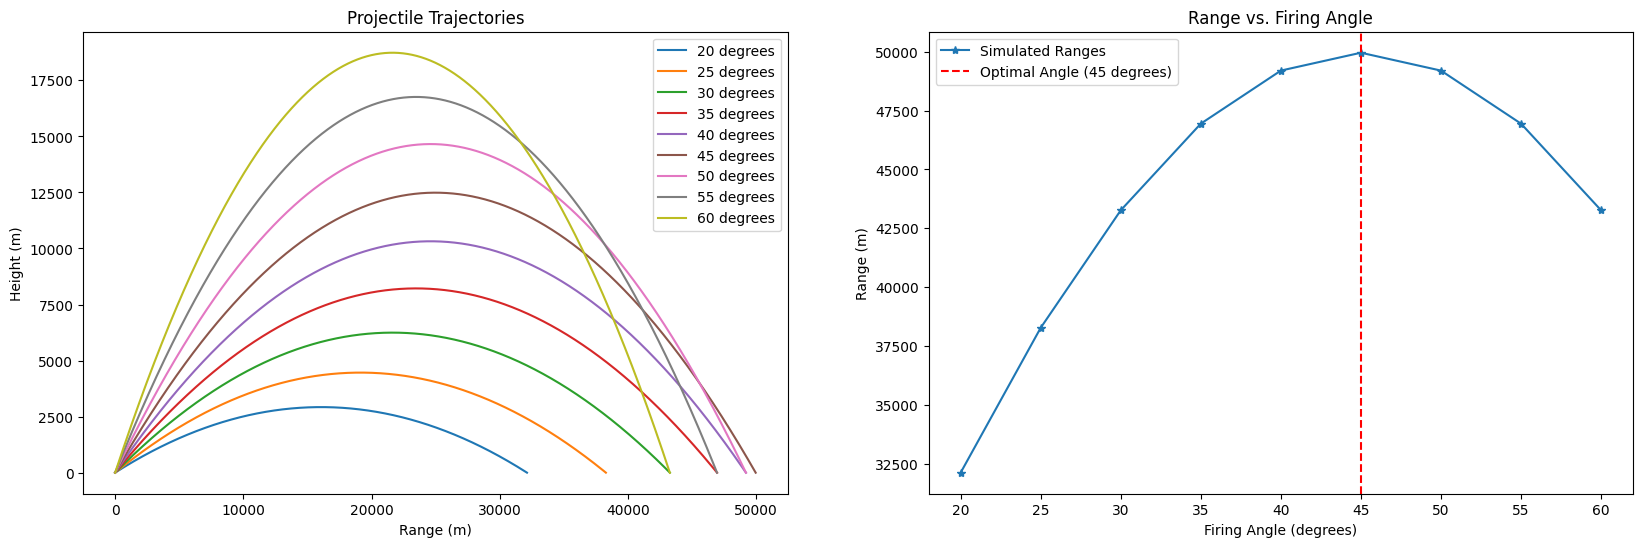

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
initial_speed = 700.0  # Initial speed of the projectile (m/s)
angles_deg = np.arange(20, 65, 5)  # Firing angles in degrees

# Convert angles to radians
angles_rad = np.deg2rad(angles_deg)

# Time step and total time
dt = 0.01  # Time step (s)

# Initialize arrays to store trajectory data
x_trajectories = []
y_trajectories = []
ranges = []

# Perform simulations for different firing angles
for angle_rad in angles_rad:
    # Initialize variables
    x = [0.0]
    y = [0.0]
    vx = initial_speed * np.cos(angle_rad)
    vy = initial_speed * np.sin(angle_rad)
    time = [0.0]

    while y[-1] >= 0:
        # Euler method for x and y components
        x_new = x[-1] + vx * dt
        y_new = y[-1] + vy * dt

        # Update velocities
        vx = vx
        vy = vy - g * dt

        # Append new positions and time
        x.append(x_new)
        y.append(y_new)
        time.append(time[-1] + dt)

    # Store trajectory data
    x_trajectories.append(x)
    y_trajectories.append(y)
    ranges.append(x[-1])

# Find the index of the maximum range
optimal_index = np.argmax(ranges)
optimal_angle_deg = angles_deg[optimal_index]
optimal_range = ranges[optimal_index]
flight_duration = 2*initial_speed*np.sin(optimal_angle_deg*np.pi/180)/g

fig, axes = plt.subplots(1,2,figsize=(20,6))

# Plot trajectories
for i, angle_deg in enumerate(angles_deg):
    axes[0].plot(x_trajectories[i], y_trajectories[i], label=f'{angle_deg} degrees')
axes[0].set_title('Projectile Trajectories')
axes[0].set_xlabel('Range (m)')
axes[0].set_ylabel('Height (m)')
axes[0].legend()

# Calculate and plot ranges
axes[1].plot(angles_deg, ranges, marker='*', label='Simulated Ranges')
axes[1].set_title('Range vs. Firing Angle')
axes[1].set_xlabel('Firing Angle (degrees)')
axes[1].set_ylabel('Range (m)')
axes[1].axvline(x=optimal_angle_deg, color='r', linestyle='--', label=f'Optimal Angle ({optimal_angle_deg} degrees)')
axes[1].legend()

# Display optimal range and angle
print(f"Optimal Range: {optimal_range:.2f} meters")
print(f"Optimal Angle: {optimal_angle_deg:.2f} degrees")
print(f"Duration of Flight: {flight_duration: .2f}s")
plt.show()

# Problem 4

Optimal Range: 22045.03 meters
Optimal Angle: 40.00 degrees


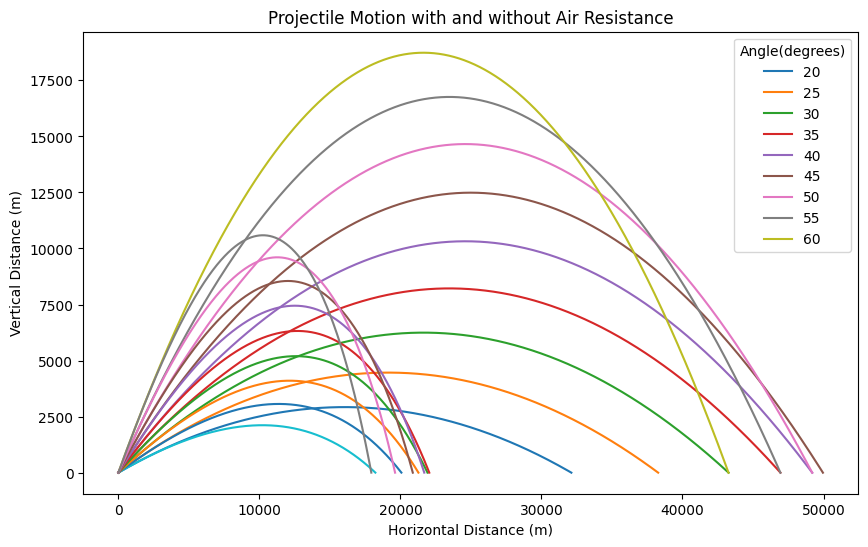

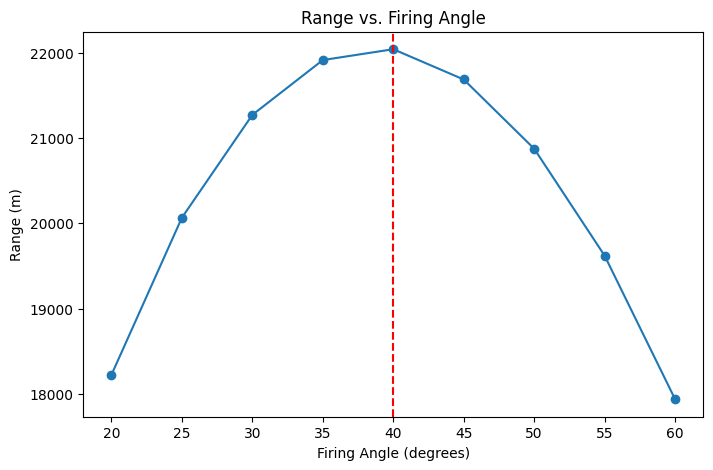

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
b_over_m = 4e-5  # Air resistance coefficient (1/m)
v0 = 700.0  # Initial velocity (m/s)
angles = np.arange(20, 65, 5)  # Firing angles (degrees)

# Function to calculate the projectile trajectory with air resistance
def calculate_trajectory(angle_deg):
    # Convert angle to radians
    angle_rad = np.radians(angle_deg)
    
    # Time step and initial conditions
    dt = 0.01  # Time step (s)
    x = [0.0]  # Initial position in the x-direction
    y = [0.0]  # Initial position in the y-direction
    vx = [v0 * np.cos(angle_rad)]  # Initial velocity in the x-direction
    vy = [v0 * np.sin(angle_rad)]  # Initial velocity in the y-direction
    
    # Euler's method simulation
    while y[-1] >= 0:
        # Calculate new velocities
        v = np.sqrt(vx[-1]**2 + vy[-1]**2)
        ax = -b_over_m * v * vx[-1]
        ay = -g - b_over_m * v * vy[-1]
        
        # Update positions and velocities
        x.append(x[-1] + vx[-1] * dt)
        y.append(y[-1] + vy[-1] * dt)
        vx.append(vx[-1] + ax * dt)
        vy.append(vy[-1] + ay * dt)
    
    return x, y

# Calculate and plot trajectories for different angles
plt.figure(figsize=(10, 6))
for i, angle_deg in enumerate(angles_deg):
    plt.plot(x_trajectories[i], y_trajectories[i])
for angle in angles:
    x, y = calculate_trajectory(angle)
    plt.plot(x, y)

plt.title('Projectile Motion with and without Air Resistance')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend(title="Angle(degrees)",labels=list(angles))

# Calculate and plot the range for different angles
ranges = []
for angle in angles:
    x, _ = calculate_trajectory(angle)
    ranges.append(max(x))

plt.figure(figsize=(8, 5))
plt.plot(angles, ranges, marker='o')
plt.axvline(x=angles[np.argmax(ranges)], color='r', linestyle='--', label=f'Optimal Angle ({optimal_angle_deg} degrees)')
plt.title('Range vs. Firing Angle')
plt.xlabel('Firing Angle (degrees)')
plt.ylabel('Range (m)')
print(f"Optimal Range: {max(ranges):.2f} meters")
print(f"Optimal Angle: {angles[np.argmax(ranges)]:.2f} degrees")
plt.show()

The End